# Zomato Analysis: Consumer Behaviour

# Introduction
- Zomato is a popular online food delivery and restaurant discovery platform. It provides users with restaurant information, reviews, menus, and ratings. Zomato is a leading food delivery and restaurant discovery platform that connects millions of users to restaurants across the globe. The dataset used in this analysis includes detailed information about over 20,000 restaurants, covering aspects like cuisine types, price range, ratings, reviews, location, and service types.
Through data visualization and analysis, we explore patterns in food choices, pricing behavior, and city-wise performance which will help to answer that
"What makes a restaurant successful on Zomato?"

# Objective
- In this project, we aim to analyze Zomato restaurant data to identify key factors
that contribute to the success of restaurants, as measured by their ratings. By
exploring various features such as location, cuisine, pricing, and service
offerings, we aim to provide insights that can help restaurant owners and
Zomato users make informed decisions.

In [4]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Indian-Resturants.csv')

In [8]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [10]:
df.describe().round(1)

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,211944.0,211944.0,211944.0,211944.0,211944.0,211944.0,211944.0,211944.0,211944.0,211944.0,211896.0,211944.0,211944.0
mean,13494112.3,4746.8,21.5,77.6,1.0,595.8,1.9,3.4,378.0,257.0,0.0,-0.3,-1.0
std,7883722.0,5568.8,22.8,7.5,0.0,606.2,0.9,1.3,925.3,867.7,0.0,1.0,0.0
min,50.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-18.0,0.0,0.0,-1.0,-1.0
25%,3301027.0,11.0,15.5,74.9,1.0,250.0,1.0,3.3,16.0,3.0,0.0,-1.0,-1.0
50%,18695734.0,34.0,22.5,77.4,1.0,400.0,2.0,3.8,100.0,18.0,0.0,-1.0,-1.0
75%,18812974.0,11306.0,26.8,80.2,1.0,700.0,2.0,4.1,362.0,128.0,0.0,1.0,-1.0
max,19159790.0,11354.0,10000.0,91.8,1.0,30000.0,4.0,4.9,42539.0,17702.0,0.0,1.0,-1.0


In [12]:
df.describe(include = object)

,name,establishment,url,address,city,locality,zipcode,locality_verbose,cuisines,timings,currency,highlights,rating_text
count,211944,211944,211944,211810,211944,211944,48757,211944,210553,208070,211944,211944,211944
unique,41100,27,55568,50657,99,3731,1311,3910,9382,7740,1,31455,39
top,Domino's Pizza,['Quick Bites'],https://www.zomato.com/chennai/3bs-buddies-bar...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,Civil Lines,0,"Ana Sagar Lake, Ajmer",North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Very Good
freq,3108,64390,169,299,11630,3660,7100,1760,15996,26605,211944,3352,65451


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

# Dropping Columns which is not required

In [17]:
df.drop(['address','url','city_id','zipcode','country_id','timings','opentable_support','latitude','longitude','takeaway','currency' ], axis = 1, inplace = True)

In [19]:
df.shape

(211944, 15)

In [21]:
df['main_cuisines'] = df['cuisines'].str.split(',').str[0].str.strip()

In [23]:
df.rename(columns = {'establishment':'rest_type'}, inplace = True)

In [25]:
df.isnull().sum()

res_id                     0
name                       0
rest_type                  0
city                       0
locality                   0
locality_verbose           0
cuisines                1391
average_cost_for_two       0
price_range                0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
delivery                   0
main_cuisines           1391
dtype: int64

In [27]:
df['cuisines'].fillna('unknown' , inplace = True)

In [29]:
df['main_cuisines'].fillna('unknown' , inplace = True)

In [31]:
df

,res_id,name,rest_type,city,locality,locality_verbose,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,main_cuisines
0,3400299,Bikanervala,['Quick Bites'],Agra,Khandari,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1,North Indian
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],Agra,Agra Cantt,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,-1,North Indian
2,3401013,Bhagat Halwai,['Quick Bites'],Agra,Shahganj,"Shahganj, Agra","Fast Food, Mithai",300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,1,Fast Food
3,3400290,Bhagat Halwai,['Quick Bites'],Agra,Civil Lines,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,1,Desserts
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],Agra,Tajganj,"Tajganj, Agra","North Indian, Continental, Italian",1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,1,North Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],Vadodara,Fatehgunj,"Fatehgunj, Vadodara",North Indian,600,2,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,-1,North Indian
211940,3200996,Raju Omlet,['Quick Bites'],Vadodara,Karelibaug,"Karelibaug, Vadodara",Fast Food,300,1,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,1,Fast Food
211941,18984164,The Grand Thakar,['Casual Dining'],Vadodara,Alkapuri,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese",700,2,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,-1,Gujarati
211942,3201138,Subway,['Quick Bites'],Vadodara,Akota,"Akota, Vadodara","Fast Food, Sandwich, Salad",500,2,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,1,Fast Food


In [33]:
df.duplicated().sum()

151533

In [34]:
df.drop_duplicates(inplace=True)

In [36]:
df.reset_index(drop=True,inplace=True)

In [39]:
df.duplicated().sum()

0

In [41]:
df.shape

(60411, 16)

In [43]:
df['rest_type'].value_counts()

rest_type
['Quick Bites']        15473
['Casual Dining']      13761
['Café']                4644
['Dessert Parlour']     3915
['Bakery']              3887
['Sweet Shop']          2712
['Beverage Shop']       2566
[]                      1920
['Fine Dining']         1656
['Food Court']          1569
['Bar']                 1550
['Dhaba']               1334
['Kiosk']               1196
['Lounge']               898
['Food Truck']           874
['Bhojanalya']           654
['Mess']                 397
['Pub']                  393
['Paan Shop']            326
['Confectionery']        227
['Butcher Shop']         154
['Microbrewery']         136
['Club']                 113
['Shack']                 21
['Cocktail Bar']          17
['Irani Cafe']            14
['Pop up']                 4
Name: count, dtype: int64

- Here it can be seen that many rows in rest_type columns are filled with an empty list[] by using value_counts method, so this is replaced with mode value.

In [46]:
df['rest_type'] = df['rest_type'].replace('[]',np.nan)

In [48]:
df['rest_type'].fillna(df['rest_type'].mode()[0], inplace = True)

In [50]:
df['average_cost_for_two'].unique()

array([  700,   600,   300,  1000,   400,   500,  1200,  1600,   250,
         200,   150,  1500,   800,   450,   850,   350,   900,  6000,
         650,   550,  2500,  6500,  5500,  4300,  3600,  3500,  3200,
        3000,  2800,  2000,  1800,  1400,  1300,  1250,  1150,  1100,
        1050,    50,    60,   100,   750,     0,   220,   260,   950,
        1900,  2400,  2300,  2200,  1700,  1230,    70,   140,   120,
         470,    20,    40,   110,    80,    90,   440,  2100, 14000,
        5000,  4500,  4100,  4000,  3700,  3400,  2700,  2600,  1650,
        1350,   180,  1260,     2,   197,   312,   170,   240,   330,
        3100,  4200,  1850,  3300,  4800,  3800,  3250,  2900,  1750,
         282,    35,   149,  1550,  5100,  6600,  1450,   160,  2250,
        8000,  7000,  3900,  3650,  1020,   320,   360,   280,   130,
       15000,  2501,    30,  1950,  1875,  1190,   309, 12000,   380,
         299,    45,   190,  4600,   880,    75,   620,   999, 10000,
         505, 30000,

- Some values here are seem inconsistent like (0, 2, 15, 20, 15000, 30000)

# Groupby

In [54]:
df.groupby('rest_type')['aggregate_rating'].mean().sort_values(ascending=False)

rest_type
['Microbrewery']       4.310294
['Pub']                3.798219
['Cocktail Bar']       3.570588
['Lounge']             3.507127
['Fine Dining']        3.490942
['Club']               3.383186
['Casual Dining']      3.321699
['Irani Cafe']         3.321429
['Café']               3.300732
['Bar']                3.133613
['Dessert Parlour']    3.132107
['Butcher Shop']       3.110390
['Quick Bites']        3.076721
['Sweet Shop']         2.730162
['Food Court']         2.682473
['Bakery']             2.620118
['Beverage Shop']      2.573967
['Dhaba']              2.568966
['Kiosk']              2.362876
['Food Truck']         2.320023
['Mess']               2.200252
['Paan Shop']          1.875767
['Pop up']             1.800000
['Bhojanalya']         1.552446
['Shack']              1.528571
['Confectionery']      1.527753
Name: aggregate_rating, dtype: float64

- Premium or niche dinning experiences tend to receive better ratings. Everyday or low cost options recieve lower average ratings, possibility due to expectations or service differences

# Price Range vs Popularity & Rating

In [58]:
 df.groupby('price_range')[['votes','aggregate_rating']].mean().reset_index()

,price_range,votes,aggregate_rating
0,1,103.631797,2.669885
1,2,301.399140,3.281515
2,3,643.419036,3.577530
3,4,570.482995,3.701439


- Restaurants in higher price ranges tend to have slightly better ratings, but receive fewer votes, possibly due to higher affordability.

In [61]:
df.groupby(['locality_verbose', 'rest_type'])['aggregate_rating'].mean().sort_values(ascending=False)

locality_verbose                                rest_type        
Bandra East, Mumbai                             ['Bar']              4.9
Angamali, Kochi                                 ['Quick Bites']      4.9
Soul Space Arena Mall, Marathahalli, Bangalore  ['Microbrewery']     4.9
Mayajaal Multiplex, Kanathur, Chennai           ['Casual Dining']    4.9
Phase 3, Mohali                                 ['Beverage Shop']    4.9
                                                                    ... 
Clarks Hotel, Nadesar, Varanasi                 ['Café']             0.0
Thippasandra, Bangalore                         ['Confectionery']    0.0
Nizampura, Vadodara                             ['Sweet Shop']       0.0
Nizamuddin, New Delhi                           ['Bhojanalya']       0.0
Pachpaoli, Nagpur                               ['Beverage Shop']    0.0
Name: aggregate_rating, Length: 16335, dtype: float64

- Top-rated restaurants span diverse types and cities, while unrated ones are often niche or less-reviewed outlets.

In [64]:
df.groupby(['locality_verbose', 'rest_type'])['average_cost_for_two'].mean().reset_index()

,locality_verbose,rest_type,average_cost_for_two
0,"32nd Avenue, NH8, Gurgaon, Gurgaon",['Bar'],2200.000000
1,"32nd Avenue, NH8, Gurgaon, Gurgaon",['Café'],1050.000000
2,"32nd Avenue, NH8, Gurgaon, Gurgaon",['Casual Dining'],1533.333333
3,"800 Jubilee, Jubilee Hills, Hyderabad",['Café'],1000.000000
4,"800 Jubilee, Jubilee Hills, Hyderabad",['Club'],2000.000000
...,...,...,...
16330,"Zoo Tiniali, Guwahati",['Kiosk'],325.000000
16331,"Zoo Tiniali, Guwahati",['Paan Shop'],400.000000
16332,"Zoo Tiniali, Guwahati",['Quick Bites'],384.782609
16333,"Zoo Tiniali, Guwahati",['Sweet Shop'],150.000000


- Some localities like 32nd Avenue, Gurgaon and 800 Jubilee, Hyderabad host multiple types of restaurants (Bar, Café, Casual Dining, Club), indicating they are popular dining hubs.
- Popular dining areas offer diverse restaurant types mostly priced around ₹400, while simpler outlets show lower costs and more variation.

In [67]:
df.groupby(['price_range', 'main_cuisines']).size().reset_index(name='count').head(10)

,price_range,main_cuisines,count
0,1,Afghan,12
1,1,Afghani,2
2,1,American,39
3,1,Andhra,85
4,1,Arabian,144
5,1,Asian,21
6,1,Assamese,6
7,1,Awadhi,2
8,1,BBQ,48
9,1,Bakery,2838


- Afghan cuisine is mainly served at budget-friendly places, often combined uniquely with Arabian, BBQ, or Indian cuisines.

In [70]:
df.groupby(['price_range', 'main_cuisines']).size().reset_index(name='count').tail(10)

,price_range,main_cuisines,count
344,4,South American,1
345,4,South Indian,48
346,4,Spanish,6
347,4,Steak,2
348,4,Sushi,6
349,4,Thai,36
350,4,Tibetan,1
351,4,Turkish,1
352,4,Vietnamese,2
353,4,unknown,3


- South Indian (48) and Thai (36) cuisines dominate the premium segment, showing that even regional and Asian cuisines are thriving in upscale dining.

- Cuisines like Spanish (6), Sushi (6), and Turkish, Vietnamese, South American (each with low counts) suggest a niche but diverse international presence.

# Outliers Detection

In [74]:
# It can also be checked with minimum value and maximum value

In [76]:
df.describe().round(1)

,res_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,delivery
count,60411.0,60411.0,60411.0,60411.0,60411.0,60411.0,60411.0
mean,13092788.9,538.3,1.7,3.0,261.6,194.3,-0.4
std,8133020.7,593.9,0.9,1.4,728.3,705.7,0.9
min,50.0,0.0,1.0,0.0,-18.0,0.0,-1.0
25%,3000479.0,200.0,1.0,2.9,7.0,1.0,-1.0
50%,18691499.0,400.0,1.0,3.5,42.0,11.0,-1.0
75%,18866678.5,600.0,2.0,4.0,207.0,82.0,1.0
max,19159790.0,30000.0,4.0,4.9,42539.0,17702.0,1.0


In [78]:
Q1,Q3 = df.average_cost_for_two.quantile([0.25,0.75])

In [80]:
Q1,Q3

(200.0, 600.0)

In [82]:
IQR = Q3 - Q1

In [84]:
IQR

400.0

In [86]:
UL = Q3 + 1.5 * (IQR)     

LL = Q1 - 1.5 * (IQR)

In [88]:
UL,LL

(1200.0, -400.0)

In [90]:
median = df.average_cost_for_two.median()

In [92]:
median 

400.0

In [94]:
df.average_cost_for_two = np.where(df.average_cost_for_two > 800, median, df.average_cost_for_two)

<Axes: xlabel='average_cost_for_two'>

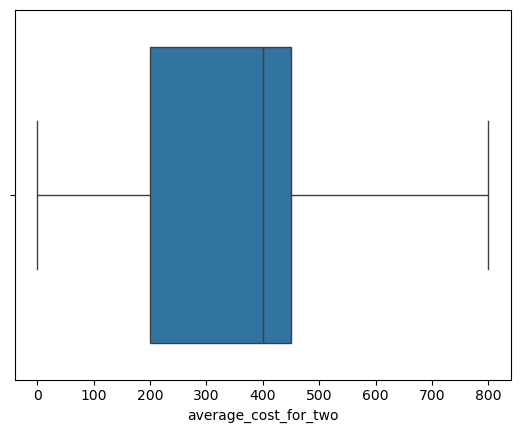

In [96]:
sns.boxplot(df.average_cost_for_two,orient='h')

In [97]:
df['rest_type'].value_counts()

rest_type
['Quick Bites']        17393
['Casual Dining']      13761
['Café']                4644
['Dessert Parlour']     3915
['Bakery']              3887
['Sweet Shop']          2712
['Beverage Shop']       2566
['Fine Dining']         1656
['Food Court']          1569
['Bar']                 1550
['Dhaba']               1334
['Kiosk']               1196
['Lounge']               898
['Food Truck']           874
['Bhojanalya']           654
['Mess']                 397
['Pub']                  393
['Paan Shop']            326
['Confectionery']        227
['Butcher Shop']         154
['Microbrewery']         136
['Club']                 113
['Shack']                 21
['Cocktail Bar']          17
['Irani Cafe']            14
['Pop up']                 4
Name: count, dtype: int64

# Top 10 most common restaurant types

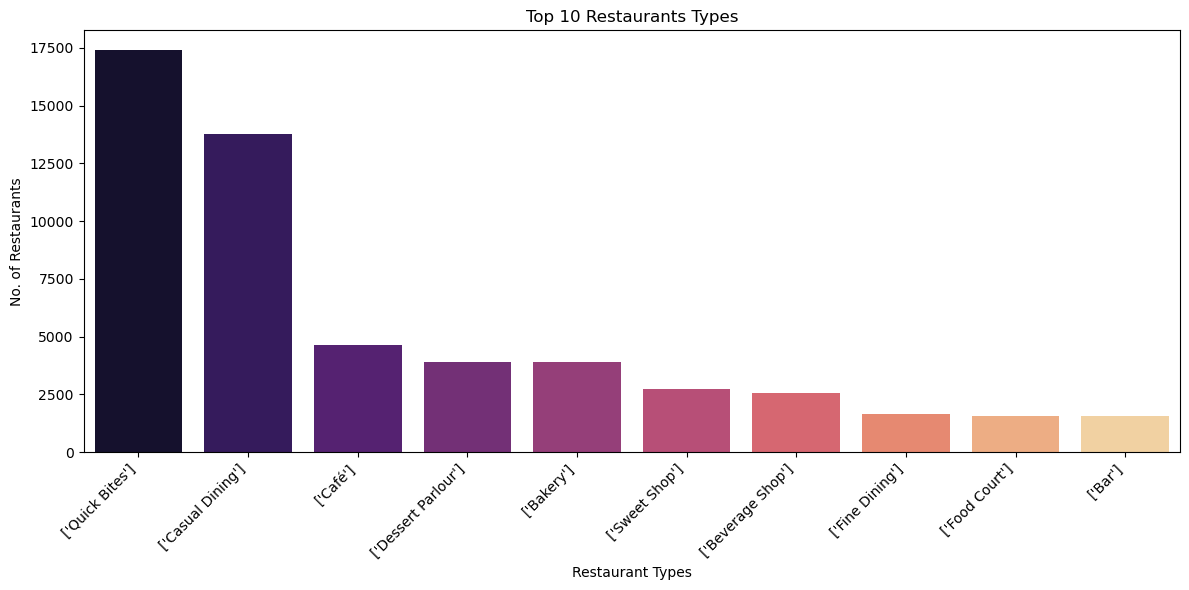

In [101]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['rest_type'].value_counts().head(10).index, y = df['rest_type'].value_counts().head(10).values, palette = 'magma')
plt.title('Top 10 Restaurants Types')
plt.xlabel('Restaurant Types')
plt.ylabel('No. of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- “The most common restaurants are dominated by quick-service formats like cafés and quick bites, highlighting consumer preference for Quick Bites and casual dining.”

# Top 10 Cuisines by their Value Counts

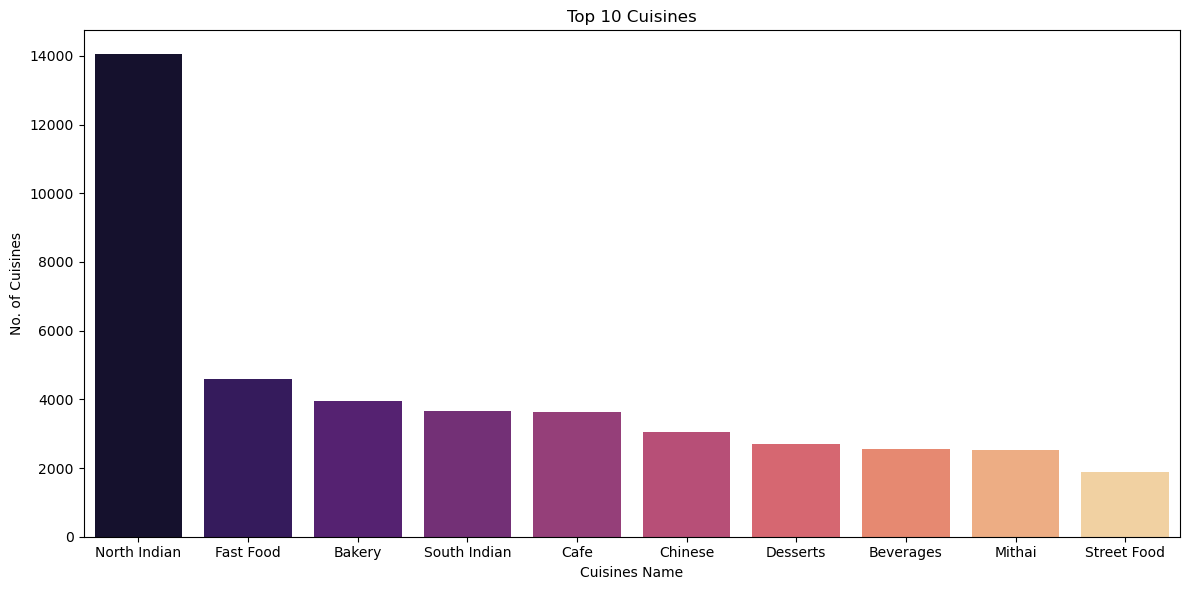

In [105]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['main_cuisines'].value_counts().head(10).index, y = df['main_cuisines'].value_counts().head(10).values, palette = 'magma')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisines Name')
plt.ylabel('No. of Cuisines')
plt.tight_layout()
plt.show()

- “The top 10 cuisines by frequency highlight consumer favorites, with a strong tilt toward versatile, comfort-driven options like North Indian, Chinese, and Fast Food, reflecting both cultural preferences and everyday accessibility.”

# Top 10 Cities by Average Rating

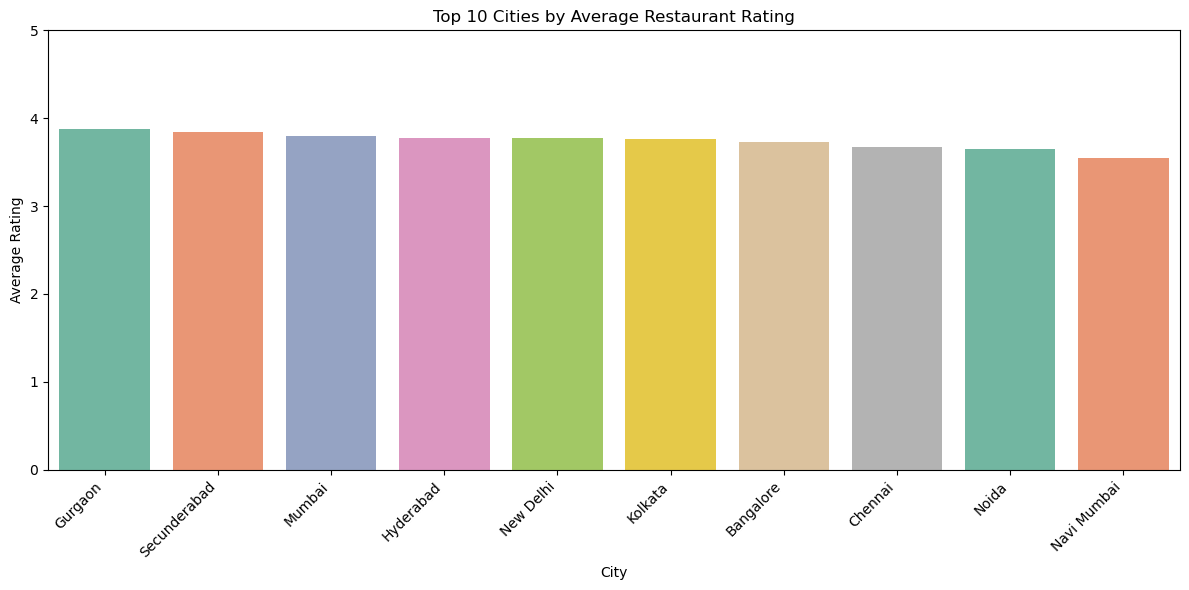

In [109]:

top_cities = df.groupby('city', as_index=False)['aggregate_rating'].mean().sort_values(by='aggregate_rating', ascending=False).head(10)


plt.figure(figsize=(12,6))
sns.barplot(x='city', y='aggregate_rating', data=top_cities, palette='Set2')
plt.title('Top 10 Cities by Average Restaurant Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

- “The top-rated cities reflect a concentration of high-quality dining experiences, with cities like Gurgaon, Bangalore, Mumbai, and Delhi leading due to their majority of working population, diverse food scenes, vibrant urban culture, and customer-driven culinary standards.”

# Top 10 Cuisines by Average Rating

In [113]:
top_cuisines = df.groupby('main_cuisines')['aggregate_rating'].mean().sort_values(ascending=False).head(10).reset_index()

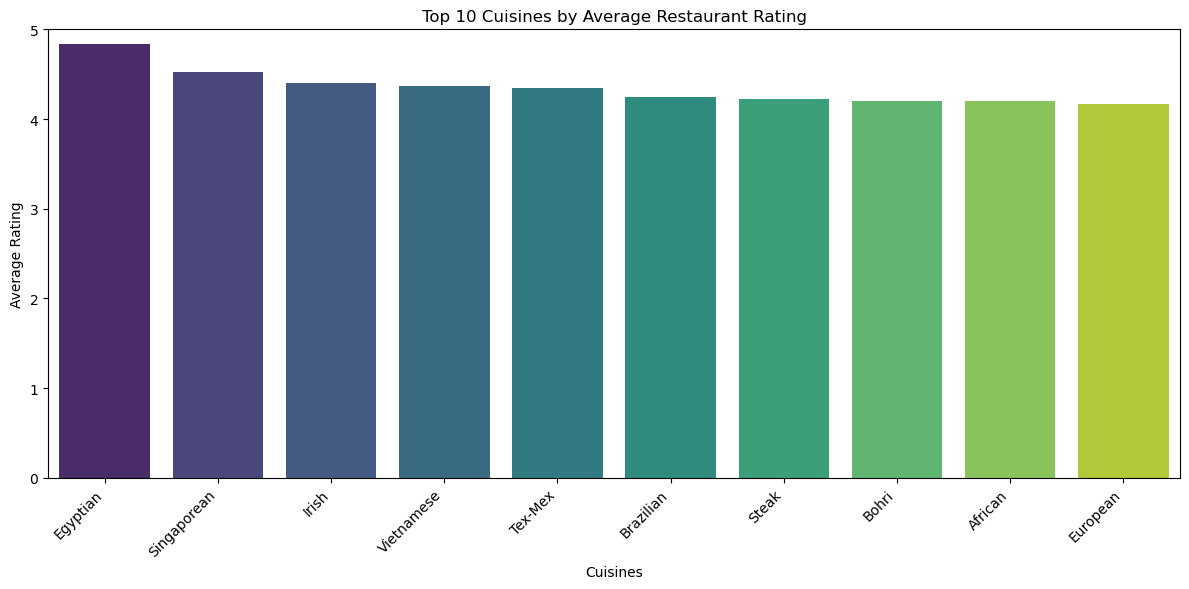

In [115]:
top_cuisines = df.groupby('main_cuisines')['aggregate_rating'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='main_cuisines', y='aggregate_rating', data = top_cuisines, palette='viridis') 
plt.title('Top 10 Cuisines by Average Restaurant Rating')
plt.xlabel('Cuisines')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

- North Indian cuisines might have lower average ratings compared to Egyptian or Irish, even though they’re extremely popular
- North Indian food is everywhere and gets mixed reviews, while rarer cuisines like Egyptian and Irish often come from higher-end places and get better ratings.

# Distribution of Price Range

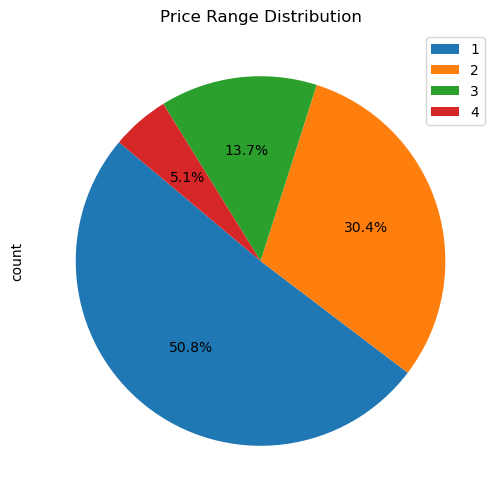

In [119]:
df['price_range'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, figsize=(6,6), labels=None)
plt.title('Price Range Distribution')
plt.legend(labels=df['price_range'].value_counts().index, loc='upper right')
plt.show()

- “A majority of restaurants operate in the lowest price bracket, showing strong demand for budget-friendly dining experiences.”
- “While affordable dining dominates, a visible segment of restaurants caters to premium experiences, especially in urban hubs.”

# Relationship between Votes and Rating

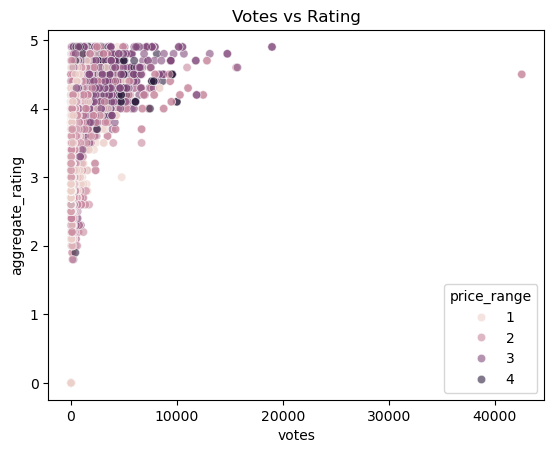

In [124]:
sns.scatterplot(data=df, x='votes', y='aggregate_rating', hue='price_range', alpha=0.6)
plt.title('Votes vs Rating')
plt.show()

- "Out of all the restaurants in the dataset, 4,670 have received zero user votes — highlighting a significant portion of listings with little to no user engagement. This could indicate either low visibility, new establishments, or inactive users."
- 'As votes increase (right side of the plot), ratings generally trend upward toward 4.0–5.0 — showing that popular restaurants are often highly rated.'
- 'There are a handful of points with high votes but lower ratings (~2.5–3.0) — these could represent popular but polarizing places.'
'- Most restaurants receive little to no votes, but higher-rated places tend to get more engagement. Price range plays a role in vote volume and rating spread, especially at higher levels.'

# Relationship Between Price Range and Aggregate Rating

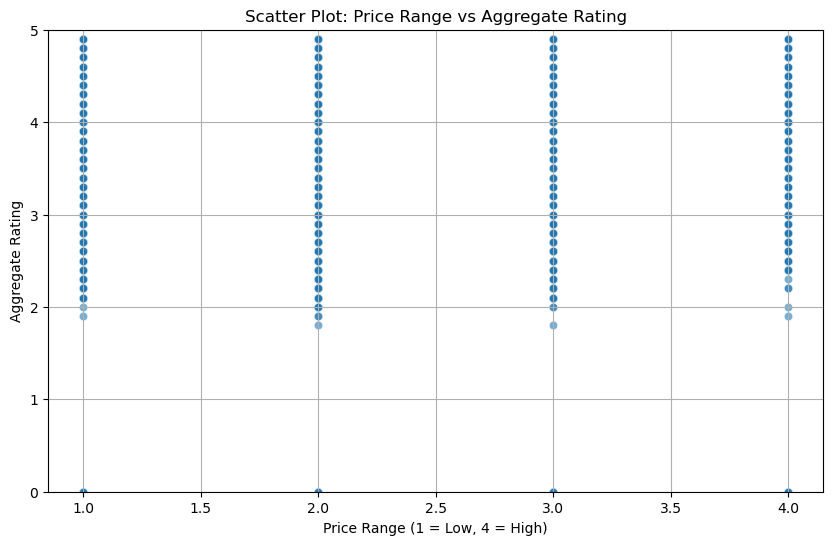

In [127]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price_range', y='aggregate_rating', alpha=0.6)

plt.title('Scatter Plot: Price Range vs Aggregate Rating')
plt.xlabel('Price Range (1 = Low, 4 = High)')
plt.ylabel('Aggregate Rating')
plt.ylim(0, 5)
plt.grid(True)
plt.show()

'- Restaurant quality (rating) isn't tied directly to how expensive the place is. Budget and luxury restaurants alike can score both high and low in customer satisfaction.
'


# Average Rating by Restaurant Type

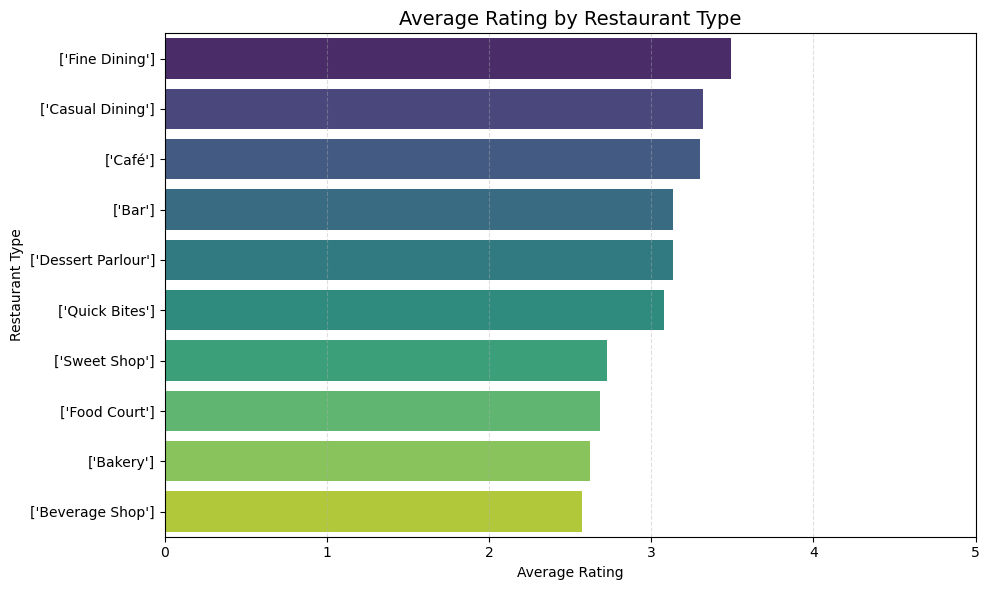

In [130]:

top_types = df['rest_type'].value_counts().head(10).index
rest_df = df[df['rest_type'].isin(top_types)]


rest_type_avg = rest_df.groupby('rest_type')['aggregate_rating'].mean().reset_index().sort_values(by='aggregate_rating', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(data=rest_type_avg, x='aggregate_rating', y='rest_type', palette='viridis')
plt.title('Average Rating by Restaurant Type', fontsize=14)
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Type')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


"Casual Dining and Cafés consistently receive higher average ratings, suggesting that customers value a relaxed dining atmosphere. - Quick Bites and Dessert Parlors also perform well, while Food Courts show relatively lower ratings — possibly due to variability in service or ambiance."

# "Relationship Between User Votes and Restaurant Ratings"

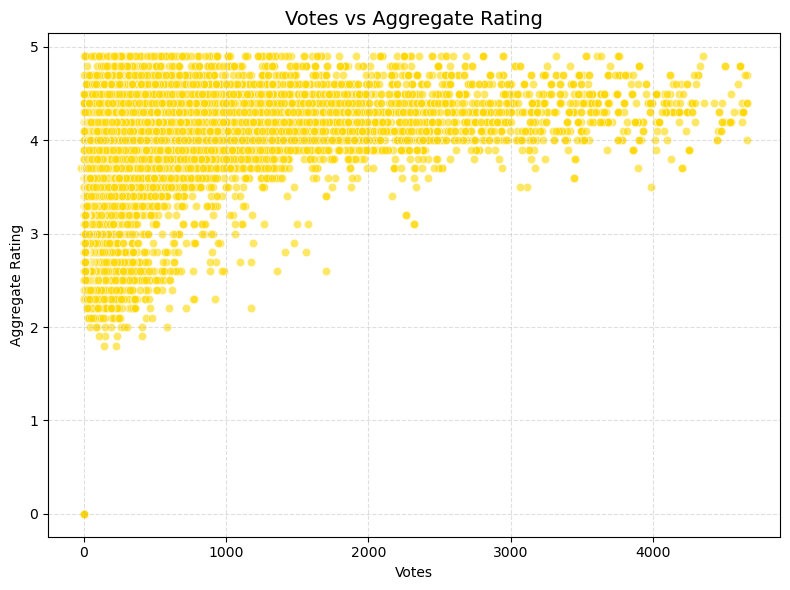

In [135]:
filtered_df = df[df['votes'] < 4670]
plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_df, x='votes', y='aggregate_rating', alpha=0.6, color="gold")
plt.title('Votes vs Aggregate Rating', fontsize=14)
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

- "Restaurants with more user votes generally have higher ratings, indicating a correlation between popularity and perceived quality. However, many lesser-known restaurants still have high ratings, suggesting potential hidden gems."

# Correlation Heatmap of Numeric Features

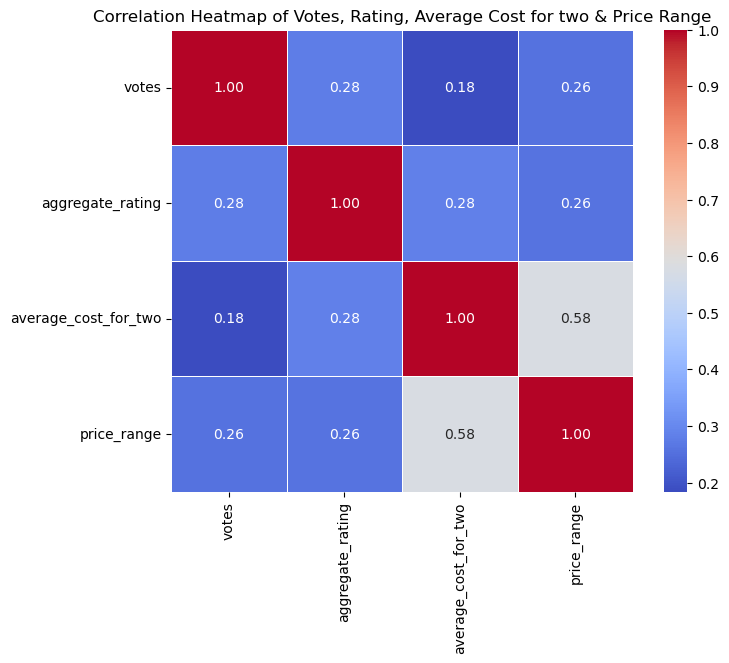

In [140]:
numeric_cols = ['votes', 'aggregate_rating', 'average_cost_for_two', 'price_range']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Votes, Rating, Average Cost for two & Price Range')
plt.show()


- "Votes show a weak positive correlation with ratings, while average cost and price range are strongly related — as expected. But higher price doesn't necessarily mean higher rating."

# Average Rating by City and Price Range

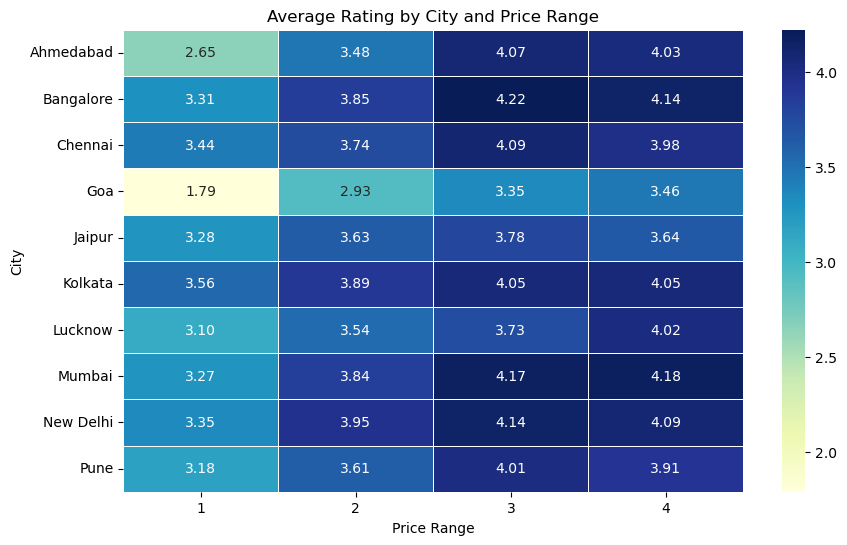

In [144]:

top_cities = df['city'].value_counts().head(10).index
heat_df = df[df['city'].isin(top_cities)]


pivot = heat_df.pivot_table(index='city', columns='price_range', values='aggregate_rating', aggfunc='mean')


plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".2f")
plt.title('Average Rating by City and Price Range')
plt.xlabel('Price Range')
plt.ylabel('City')
plt.show()


- Higher-priced restaurants generally receive better ratings, indicating improved quality and service with cost. Cities like Bangalore, Mumbai, and Delhi consistently show high ratings across all price ranges. In contrast, Goa and Jaipur have lower ratings, especially in the budget category. Overall, customer satisfaction tends to increase with price in most cities.

# Conclusion

- A successful restaurant on Zomato typically combines high-quality food, positive customer experience, and a well-matched price range for its target audience. Restaurants offering popular cuisines, maintaining good service, and operating in food-savvy cities like Gurgaon or Bangalore tend to receive higher ratings and more votes, leading to greater visibility and customer trust. However the analysis is limited by missing data, subjective ratings, and the lack of real-time updates. It focuses mainly on major cities and doesn’t include business metrics like revenue or profitability.